## Regularisation 

This is to reduce overfit. 

### l1 and l2 regularisation
This is the same as linear models. l2 to constrain connecting weights (recall it is sum of the weights squared with a coefficient alpha). Use l1 If you want a sparse model (many connecting weights to be 0), recall that l1 regularisation tends to make the weights of less important features to 0.


In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid, y_train,  y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25)

print(X_train.shape, y_train.shape)

(45000, 28, 28) (45000,)


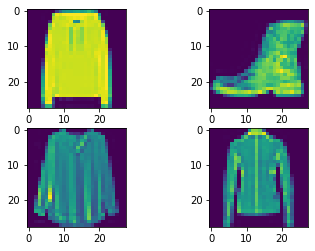

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[1][0].imshow(X_train[2])
ax[1][1].imshow(X_train[3])

In [8]:
from tensorflow.keras import activations, layers, initializers, callbacks, models
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, BatchNormalization, ReLU, ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam, Adamax
from tensorflow import keras

# regularisers
# l1 tends to generate sparse models (mostly zeros), which saves memory and will run very fast at runtime
from tensorflow.keras.regularizers import l1, l2, l1_l2

es_cb = EarlyStopping(patience=3, monitor='val_loss') # early stopping at min loss
md_cb = ModelCheckpoint("f_mnist_model_A.h5", save_best_only=True) # setup a model check point

## Refactor layers using partial functions

As when we generate a ANN, we typically will use same activation, initialisers and regularisers. It makes sesne for us to reduce code clutter and improve readability by refactor it. 

In [11]:
from functools import partial

RegularisedDense = partial(Dense, activation = 'selu', 
                           kernel_initializer = keras.initializers.LecunNormal(), 
                           kernel_regularizer = l2(0.01))


In [13]:
keras.backend.clear_session()    
initializer = keras.initializers.LecunNormal()

# instead of below
"""
model = Sequential([
    Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    BatchNormalization(),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    BatchNormalization(),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    BatchNormalization(),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    BatchNormalization(),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    BatchNormalization(),
    Dense(10, activation = "softmax")
])
"""


model = Sequential([
    Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    RegularisedDense(300),
    BatchNormalization(),
    RegularisedDense(300),
    BatchNormalization(),
    RegularisedDense(300),
    BatchNormalization(),
    RegularisedDense(300),
    BatchNormalization(),
    Dense(10, activation = "softmax")
])

NUM_EPOCHS = 20

model.compile(optimizer =  "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data = (X_valid, y_valid), callbacks = [es_cb],
                    verbose = True)
print(model.evaluate(X_test, y_test))

Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3320 - accuracy: 0.7514 - val_loss: 1.0504 - val_accuracy: 0.7098
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9372 - accuracy: 0.7668 - val_loss: 0.9244 - val_accuracy: 0.7735
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8615 - accuracy: 0.7869 - val_loss: 0.7561 - val_accuracy: 0.8120
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7996 - accuracy: 0.7968 - val_loss: 0.7079 - val_accuracy: 0.8245
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.7252 - accuracy: 0.8103 - val_loss: 0.6632 - val_accuracy: 0.8214
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6887 - accuracy: 0.8168 - val_loss: 0.6188 - val_accuracy: 0.8331
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6583 - accuracy: 0.8193 - val_loss: 0.5810 - val_accuracy:

## Dropouts

*Dropout* is one of the most popular regularisation methods for deep neural networks. typically getting a 1-2% accuracy boost simply by add dropouts (consider if DNN is 95%) 1-2% of that is easily 20-30% imporovement.

At every training step, every neual (including the iutput neurons, excluding output neurons) has a probability *p* of being temorarily dropped out. (entirely ignored in the training for **this step**)

*p* is called the *drop rate* and typically set between 10% and 50%:
- ~20-30% in recurrent neural networks
- ~40-50% in convolutional neural networks.

After training, neuron is no longer being dropped

### Version Control

In [37]:
!git add 8_regularisation.ipynb
!git commit -m "added regularisation"
!git push

The file will have its original line endings in your working directory


[master 4430f95] added regularisation
 1 file changed, 291 insertions(+)
 create mode 100644 tensorflow/8_regularisation.ipynb


To https://github.com/auslei/python.git
   1445625..4430f95  master -> master
